<a href="https://www.kaggle.com/code/martiritter/titanic-survivors?scriptVersionId=262104317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading Data and initial exploration

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

Preprocessing includes setting markers for missing cabins (indicating a cheaper room?) extracting the title and checking whether the title is not just "Mr." (separating both women and passengers with honorifics) and extracting the deck and room from the cabin (if two are given, then only the first is considered), if this info is available. The deck is encoded as a categorical and can be later used even when the cabin is missing.

In [3]:
def preprocessing_step1(in_df):
    out_df = in_df.copy()
    out_df = out_df.replace([np.inf, -np.inf], np.nan)
    out_df["cabin_unknown"] = out_df["Cabin"].isna()
    out_df["title"] = out_df["Name"].str.extract(r", (\w+). ")
    out_df["title_is_mr"] = out_df["title"].eq("Mr")
    out_df[["deck", "room"]] = out_df["Cabin"].str.extract(r"(\w+?)(\d+)", expand=True)
    out_df["deck"] = pd.Categorical(out_df["deck"], ordered=True)
    out_df["room"] = out_df["room"].astype(float)

    return out_df

train_df = preprocessing_step1(train_df)
test_df = preprocessing_step1(test_df)
train_df = train_df.sort_values(["deck", "room"])
train_df = train_df.sample(frac=1.0, random_state=100)
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_unknown,title,title_is_mr,deck,room
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,True,Mrs,False,NaN,NaN
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,False,Mrs,False,B,58.0
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,True,Master,False,NaN,NaN
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,True,Miss,False,NaN,NaN
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.00,0,0,8471,8.3625,NaN,S,True,Mr,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,0,3,"Abbing, Mr. Anthony",male,42.00,0,0,C.A. 5547,7.5500,NaN,S,True,Mr,True,NaN,NaN
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S,True,Mrs,False,NaN,NaN
821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S,True,Mr,True,NaN,NaN
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,True,Dr,False,NaN,NaN


We visualize the extracted data using Seaborn.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

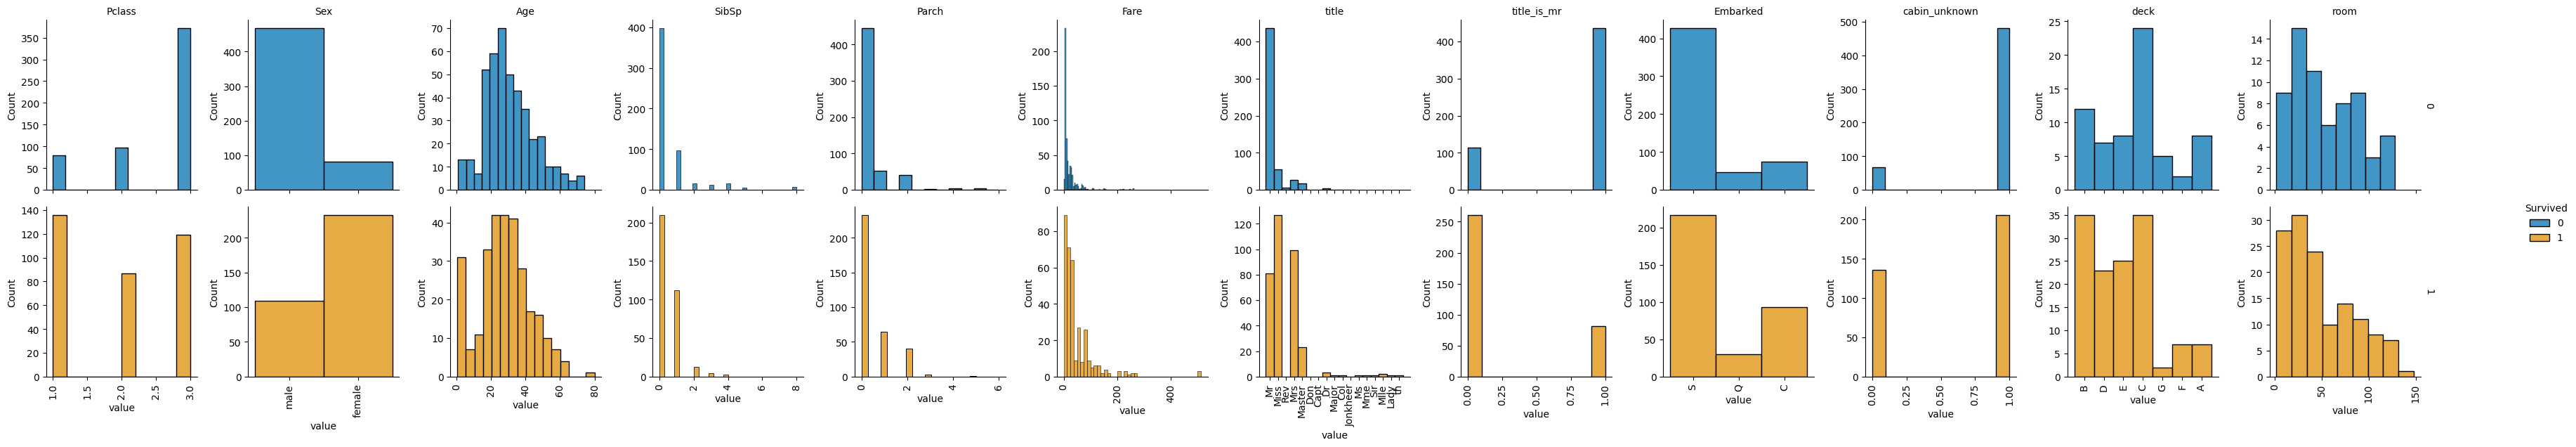

In [4]:
plot_df = train_df.melt(id_vars=["PassengerId", "Survived"])

fg = sns.FacetGrid(plot_df, 
                   row="Survived", row_order=[0, 1],
                   col="variable", col_order=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', "title", "title_is_mr", 'Embarked', 'cabin_unknown', "deck", "room"], 
                   hue="Survived", palette="colorblind",
                   sharex="col", sharey=False,
                   margin_titles=True, legend_out=True)
fg.map_dataframe(sns.histplot, x="value", multiple="dodge", legend=True)
fg.set_titles(row_template="{row_name}", col_template="{col_name}")
fg.add_legend(title="Survived")

# rotate xlabels
for ax in fg.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Preprocessing and model selection

We selected ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', "title_is_mr", 'Embarked', 'cabin_unknown', "deck"] as features as these are compatible with the test data and look promising during visualization.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from pandas.api.types import is_numeric_dtype

def preprocessing_step2(in_df, transformation_base_df=None):
    X = in_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', "title_is_mr", 'Embarked', 'cabin_unknown', "deck"]].copy()

    encoder = LabelEncoder()
    not_numeric_cols = [col for col in X.columns if not is_numeric_dtype(X[col])]
    for col in not_numeric_cols:
        encoder.fit(X[col].values if transformation_base_df is None else transformation_base_df[col].values)
        X[col] = encoder.transform(X[col])

    imputer = KNNImputer(n_neighbors=5)
    cols_with_nans = [col for col in X.columns if X[col].isna().any()]
    for col in cols_with_nans:
        imputer.fit(X[[col]] if transformation_base_df is None else transformation_base_df[[col]])
        X[col] = imputer.transform(X[[col]])

    X = X.astype(float)

    return X

X = preprocessing_step2(train_df)
y = train_df["Survived"]

We define a dictionary mapping candidate model classes (from scikit-learn) to the grid of kwargs we plan to search.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_class_grid_dict = {
    DecisionTreeClassifier: dict(max_depth=[3, 5, 7]),
    RandomForestClassifier: dict(max_depth=[3, 5, 7], n_estimators=[100, 300, 500, 700, 900]),
    LogisticRegression: dict(max_iter=[1000]),  # no real idea here what would be good grid parameters, but the estimator might fit nicely to this problem
}

Using GridSearchCV we search the parameter space we defined for the best settings.

In [7]:
from sklearn.model_selection import GridSearchCV

model_optimal_parameters_dict = {}
for model_class, grid_kwargs in model_class_grid_dict.items():
    print(f"Finding optimal parameters for {model_class.__name__}...")
    clf = GridSearchCV(estimator=model_class(), param_grid=grid_kwargs, cv=10, scoring="f1_weighted", n_jobs=-1)
    clf.fit(X=X, y=y)
    model_optimal_parameters_dict[model_class] = clf.best_params_

Finding optimal parameters for DecisionTreeClassifier...
Finding optimal parameters for RandomForestClassifier...
Finding optimal parameters for LogisticRegression...


Using the optimal parameters from the grid defined above, we now estimate the performance of each model with a variety of measures.

In [8]:
from sklearn.model_selection import cross_validate

comparison_metrics = ["f1_weighted", "recall", "precision", "roc_auc"]

model_metric_dict = {}
for model_class, model_kwargs in model_optimal_parameters_dict.items():
    classifier = model_class(random_state=100, **model_kwargs)

    cv_results = cross_validate(estimator=classifier, X=X, y=y, cv=10, scoring=comparison_metrics)
    for metric_string in comparison_metrics:
        scores = cv_results[f"test_{metric_string}"]
        model_metric_dict[(model_class.__name__, metric_string)] = scores

model_summary_df = pd.DataFrame(model_metric_dict).median().unstack()
model_summary_df

,f1_weighted,precision,recall,roc_auc
DecisionTreeClassifier,0.815737,0.778226,0.750000,0.841593
LogisticRegression,0.808188,0.769048,0.735294,0.862567
RandomForestClassifier,0.831909,0.802778,0.691176,0.871658


Again we can use Seaborn to visualize the performance of each model (with tuned parameters) based on multiple metrics.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

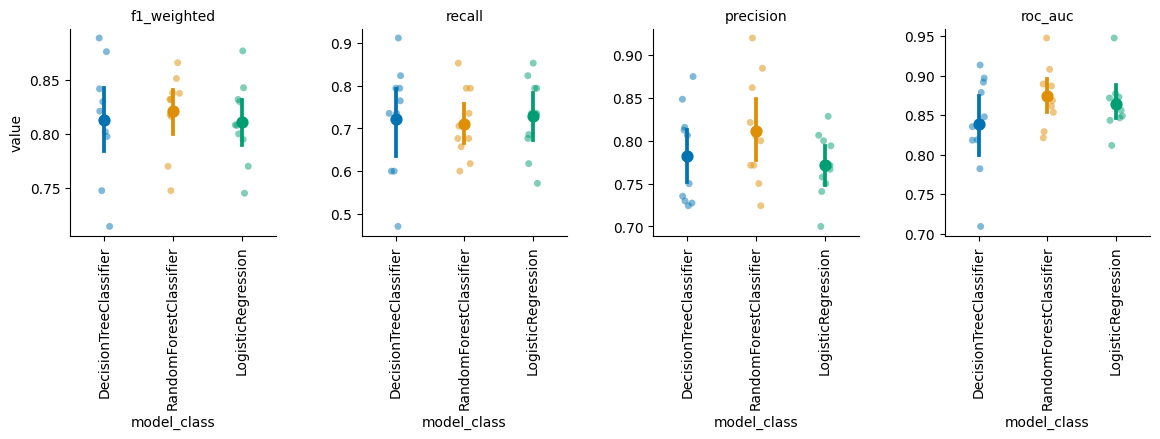

In [9]:
model_result_series = pd.DataFrame(model_metric_dict).T.stack().rename("value")
model_result_series.index.names = ["model_class", "metric", "cv"]

fg = sns.FacetGrid(model_result_series.reset_index(), col="metric", sharey=False)
fg.map_dataframe(sns.stripplot, x="model_class", y="value", hue="model_class", palette="colorblind", alpha=0.5)
fg.map_dataframe(sns.pointplot, x="model_class", y="value", hue="model_class", palette="colorblind", estimator="mean", errorbar=("ci", 95))
fg.set_titles(row_template="{row_name}", col_template="{col_name}")

# rotate xlabels
for ax in fg.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Model application
Based on these metrics we select the RandomForestClassifier and apply it to the preprocessed test data.

In [10]:
selected_classifier = RandomForestClassifier
classifier = selected_classifier(**model_optimal_parameters_dict[selected_classifier])
classifier.fit(X, y)

X_test = preprocessing_step2(test_df, transformation_base_df=train_df)
y_test = classifier.predict(X_test)

submission_series = pd.Series(index=test_df["PassengerId"], data=y_test, name="Survived")
submission_series.to_csv("/kaggle/working/submission.csv")
submission_series

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64